In [2]:
using StatsBase, Plots, CSV, DataFrames, Statistics, LsqFit

# """
# filter_spectrum(h::Histogram; threshold=2.5, average_window=5)
# Remove clocking issues from histogram using moving window average.
# Sigma threshold to remove point set to 2.5 by default. Average window defaults to 5 points either side of the current value.
# """
# function filter_spectrum!(df::DataFrame; threshold=2.5,average_window=5)

#     for iter in eachindex(df.Count[1:end-average_window])

#         while iter < 1+average_window
#             iter=iter+1
#         end

#         if iter+average_window > length(df.Count)-average_window
#             break
#         end

#         cut = mean(df.Count[iter-average_window:iter+average_window])+threshold*std(df.Count[iter-average_window:iter+average_window])
#         if df.Count[iter]>cut
#             DataFrames.deleterows!(df,iter)
#             #println("Clocking Error Found")
#         end
#     end
#     return df
# end

┌ Info: Precompiling StatsBase [2913bbd2-ae8a-5f71-8c99-4fb6c76f3a91]
└ @ Base loading.jl:1242
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1242
┌ Info: Recompiling stale cache file /user/.julia/compiled/v1.2/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1240
┌ Info: Precompiling LsqFit [2fda8390-95c7-5789-9bda-21331edee243]
└ @ Base loading.jl:1242


In [8]:
push!(collect(3:1:10),12)

2-element Array{Any,1}:
   3:1:10
 12      

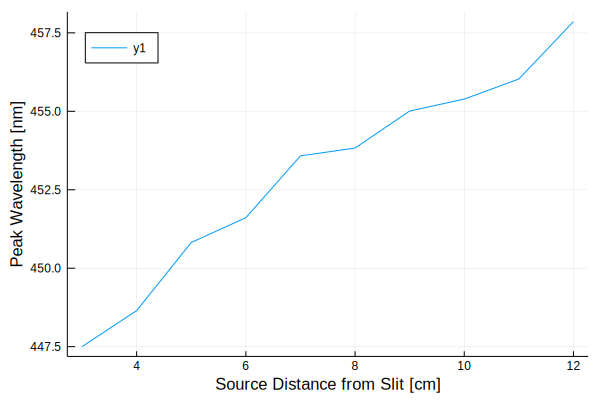

In [14]:
scan_range = push!(collect(3:1:12))
peaks = []
@. model(x, p) = p[1]*x^2 + p[2]*x + p[3]

for position in scan_range
    bg_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_bg_$(position)cm.asc"
    bg = CSV.read(bg_file,header = ["Wavelength", "Count"])

    data_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_sig_$(position)cm.asc"
    data = CSV.read(data_file,header = ["Wavelength", "Count"])

    signal = (data.Count .- bg.Count)
    signal = signal ./ maximum(signal)
    peak_bin = findfirst(isequal(maximum(signal)),signal)
    fit_result = curve_fit(model, data.Wavelength[peak_bin - 70:peak_bin+70],
                        signal[peak_bin - 70:peak_bin+70], [1.,1.,1.])
#     p = plot(data.Wavelength, signal)
#     plot!(data.Wavelength[peak_bin - 70:peak_bin+70], x->model(x, fit_result.param), linewidth = 2)

    d_fit = diff(model(400:0.01:500, fit_result.param))
                    min = minimum(abs.(d_fit))
                    peak_bin = findfirst(isequal(min), abs.(d_fit))
                    peak_wv = collect(400:0.01:500)[peak_bin]
    push!(peaks, peak_wv)
end

plot(scan_range, peaks, xlabel = "Source Distance from Slit [cm]", ylabel = "Peak Wavelength [nm]", legend = :topleft)

457.86


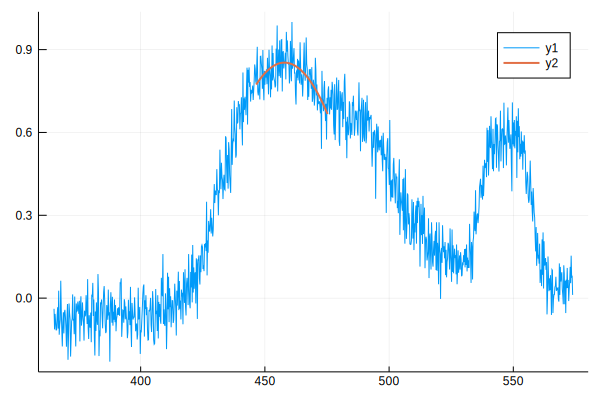

In [92]:
bg_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_bg_12cm.asc"
bg = CSV.read(bg_file,header = ["Wavelength", "Count"])

data_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_sig_12cm.asc"
data = CSV.read(data_file,header = ["Wavelength", "Count"])

signal = (data.Count .- bg.Count)
signal = signal ./ maximum(signal)
peak_bin = findfirst(isequal(maximum(signal)),signal)
fit_result = curve_fit(model, data.Wavelength[peak_bin - 70:peak_bin+70],
                    signal[peak_bin - 70:peak_bin+70], [1.,1.,1.])
#h = fit(Histogram, bg.Wavelength, weights(signal), nbins = 100)
p = plot(data.Wavelength, signal)
plot!(data.Wavelength[peak_bin - 70:peak_bin+70], x->model(x, fit_result.param), linewidth = 2)

d_fit = diff(model(400:0.01:500, fit_result.param))
                min = minimum(abs.(d_fit))
                peak_bin = findfirst(isequal(min), abs.(d_fit))
                peak_wv = collect(400:0.01:500)[peak_bin]
println(peak_wv)
p

455.39


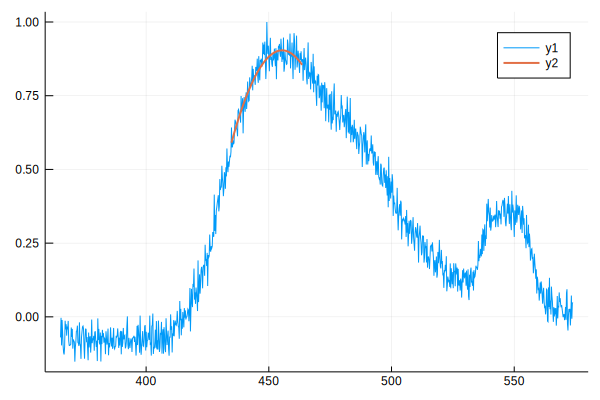

In [91]:
bg_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_bg_10cm.asc"
bg = CSV.read(bg_file,header = ["Wavelength", "Count"])

data_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_sig_10cm.asc"
data = CSV.read(data_file,header = ["Wavelength", "Count"])
plot(data.Wavelength, data.Count)
plot!(bg.Wavelength, bg.Count)
signal = (data.Count .- bg.Count)
signal = signal ./ maximum(signal)
peak_bin = findfirst(isequal(maximum(signal)),signal)
fit_result = curve_fit(model, data.Wavelength[peak_bin - 70:peak_bin+70],
                    signal[peak_bin - 70:peak_bin+70], [1.,1.,1.])
#h = fit(Histogram, bg.Wavelength, weights(signal), nbins = 100)
p = plot(data.Wavelength, signal)
plot!(data.Wavelength[peak_bin - 70:peak_bin+70], x->model(x, fit_result.param), linewidth = 2)

d_fit = diff(model(400:0.01:500, fit_result.param))
                min = minimum(abs.(d_fit))
                peak_bin = findfirst(isequal(min), abs.(d_fit))
                peak_wv = collect(400:0.01:500)[peak_bin]
println(peak_wv)
p

455.01


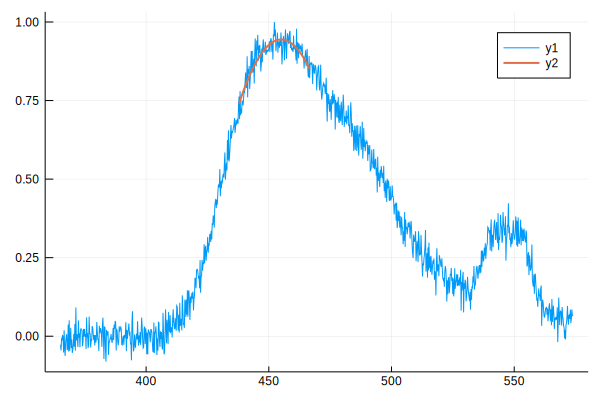

In [90]:
bg_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_bg_9cm.asc"
bg = CSV.read(bg_file,header = ["Wavelength", "Count"])

data_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_sig_9cm.asc"
data = CSV.read(data_file,header = ["Wavelength", "Count"])
plot(data.Wavelength, data.Count)
plot!(bg.Wavelength, bg.Count)
signal = (data.Count .- bg.Count)
signal = signal ./ maximum(signal)
peak_bin = findfirst(isequal(maximum(signal)),signal)
fit_result = curve_fit(model, data.Wavelength[peak_bin - 70:peak_bin+70],
                    signal[peak_bin - 70:peak_bin+70], [1.,1.,1.])
#h = fit(Histogram, bg.Wavelength, weights(signal), nbins = 100)
p = plot(data.Wavelength, signal)
plot!(data.Wavelength[peak_bin - 70:peak_bin+70], x->model(x, fit_result.param), linewidth = 2)

d_fit = diff(model(400:0.01:500, fit_result.param))
                min = minimum(abs.(d_fit))
                peak_bin = findfirst(isequal(min), abs.(d_fit))
                peak_wv = collect(400:0.01:500)[peak_bin]
println(peak_wv)
p

453.83


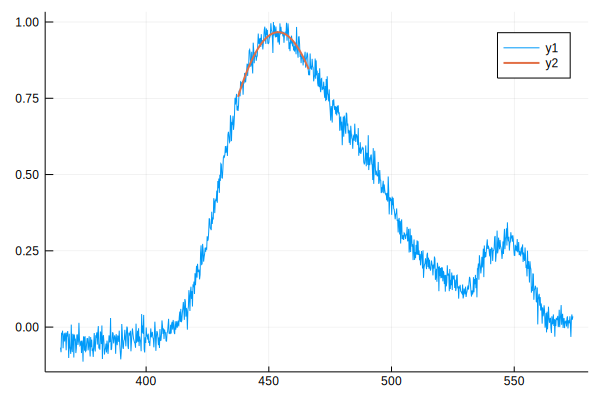

In [89]:
bg_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_bg_8cm.asc"
bg = CSV.read(bg_file,header = ["Wavelength", "Count"])

data_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_sig_8cm.asc"
data = CSV.read(data_file,header = ["Wavelength", "Count"])
plot(data.Wavelength, data.Count)
plot!(bg.Wavelength, bg.Count)
signal = (data.Count .- bg.Count)
signal = signal ./ maximum(signal)
peak_bin = findfirst(isequal(maximum(signal)),signal)
fit_result = curve_fit(model, data.Wavelength[peak_bin - 70:peak_bin+70],
                    signal[peak_bin - 70:peak_bin+70], [1.,1.,1.])
#h = fit(Histogram, bg.Wavelength, weights(signal), nbins = 100)
p = plot(data.Wavelength, signal)
plot!(data.Wavelength[peak_bin - 70:peak_bin+70], x->model(x, fit_result.param), linewidth = 2)

d_fit = diff(model(400:0.01:500, fit_result.param))
                min = minimum(abs.(d_fit))
                peak_bin = findfirst(isequal(min), abs.(d_fit))
                peak_wv = collect(400:0.01:500)[peak_bin]
println(peak_wv)
p

453.58


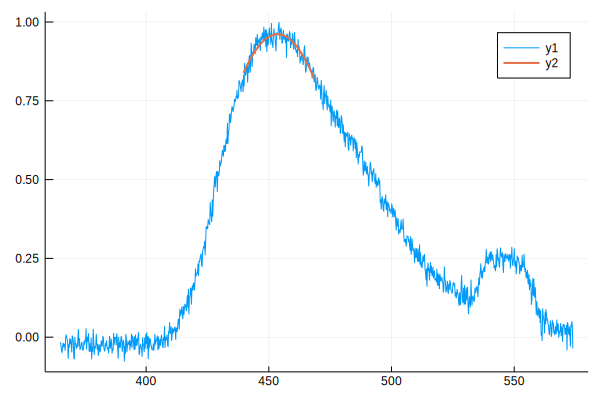

In [88]:
bg_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_bg_7cm.asc"
bg = CSV.read(bg_file,header = ["Wavelength", "Count"])

data_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_sig_7cm.asc"
data = CSV.read(data_file,header = ["Wavelength", "Count"])
plot(data.Wavelength, data.Count)
plot!(bg.Wavelength, bg.Count)
signal = (data.Count .- bg.Count)
signal = signal ./ maximum(signal)
peak_bin = findfirst(isequal(maximum(signal)),signal)
fit_result = curve_fit(model, data.Wavelength[peak_bin - 70:peak_bin+70],
                    signal[peak_bin - 70:peak_bin+70], [1.,1.,1.])
#h = fit(Histogram, bg.Wavelength, weights(signal), nbins = 100)
p = plot(data.Wavelength, signal)
plot!(data.Wavelength[peak_bin - 70:peak_bin+70], x->model(x, fit_result.param), linewidth = 2)

d_fit = diff(model(400:0.01:500, fit_result.param))
                min = minimum(abs.(d_fit))
                peak_bin = findfirst(isequal(min), abs.(d_fit))
                peak_wv = collect(400:0.01:500)[peak_bin]
println(peak_wv)
p

451.61


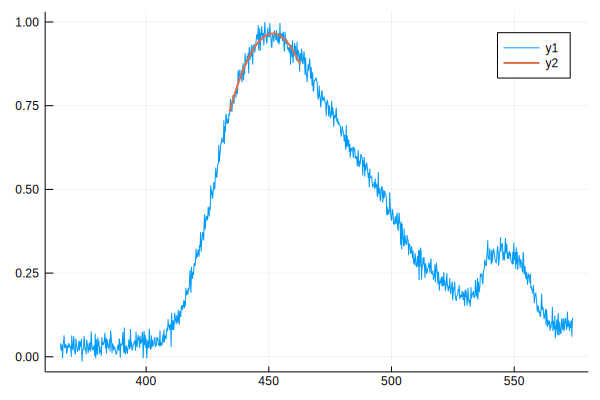

In [87]:
bg_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_bg_6cm.asc"
bg = CSV.read(bg_file,header = ["Wavelength", "Count"])

data_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_sig_6cm.asc"
data = CSV.read(data_file,header = ["Wavelength", "Count"])
plot(data.Wavelength, data.Count)
plot!(bg.Wavelength, bg.Count)
signal = (data.Count .- bg.Count)
signal = signal ./ maximum(signal)
peak_bin = findfirst(isequal(maximum(signal)),signal)
fit_result = curve_fit(model, data.Wavelength[peak_bin - 70:peak_bin+70],
                    signal[peak_bin - 70:peak_bin+70], [1.,1.,1.])
#h = fit(Histogram, bg.Wavelength, weights(signal), nbins = 100)
p = plot(data.Wavelength, signal)
plot!(data.Wavelength[peak_bin - 70:peak_bin+70], x->model(x, fit_result.param), linewidth = 2)

d_fit = diff(model(400:0.01:500, fit_result.param))
                min = minimum(abs.(d_fit))
                peak_bin = findfirst(isequal(min), abs.(d_fit))
                peak_wv = collect(400:0.01:500)[peak_bin]
println(peak_wv)
p

450.82


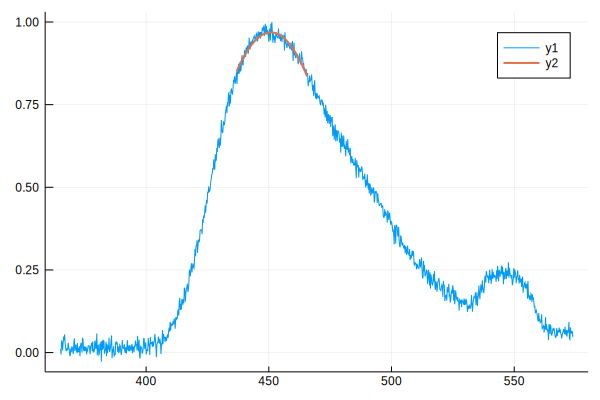

In [94]:
bg_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_bg_5cm.asc"
bg = CSV.read(bg_file,header = ["Wavelength", "Count"])

data_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_sig_5cm.asc"
data = CSV.read(data_file,header = ["Wavelength", "Count"])
plot(data.Wavelength, data.Count)
plot!(bg.Wavelength, bg.Count)
signal = (data.Count .- bg.Count)
signal = signal ./ maximum(signal)
peak_bin = findfirst(isequal(maximum(signal)),signal)
fit_result = curve_fit(model, data.Wavelength[peak_bin - 70:peak_bin+70],
                    signal[peak_bin - 70:peak_bin+70], [1.,1.,1.])
#h = fit(Histogram, bg.Wavelength, weights(signal), nbins = 100)
p = plot(data.Wavelength, signal)
plot!(data.Wavelength[peak_bin - 70:peak_bin+70], x->model(x, fit_result.param), linewidth = 2)

d_fit = diff(model(400:0.01:500, fit_result.param))
                min = minimum(abs.(d_fit))
                peak_bin = findfirst(isequal(min), abs.(d_fit))
                peak_wv = collect(400:0.01:500)[peak_bin]
println(peak_wv)
p

450.54


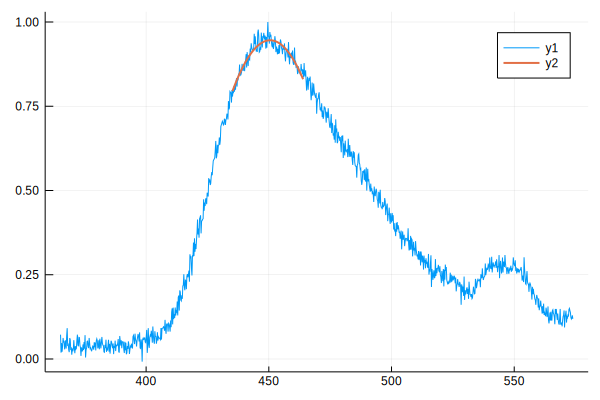

In [86]:
bg_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_bg_3.asc"
bg = CSV.read(bg_file,header = ["Wavelength", "Count"])

data_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_sig_3.asc"
data = CSV.read(data_file,header = ["Wavelength", "Count"])

signal = (data.Count .- bg.Count)
signal = signal ./ maximum(signal)
peak_bin = findfirst(isequal(maximum(signal)),signal)
fit_result = curve_fit(model, data.Wavelength[peak_bin - 70:peak_bin+70],
                    signal[peak_bin - 70:peak_bin+70], [1.,1.,1.])
#h = fit(Histogram, bg.Wavelength, weights(signal), nbins = 100)
p = plot(data.Wavelength, signal)
plot!(data.Wavelength[peak_bin - 70:peak_bin+70], x->model(x, fit_result.param), linewidth = 2)

d_fit = diff(model(400:0.01:500, fit_result.param))
                min = minimum(abs.(d_fit))
                peak_bin = findfirst(isequal(min), abs.(d_fit))
                peak_wv = collect(400:0.01:500)[peak_bin]
println(peak_wv)
p

453.74


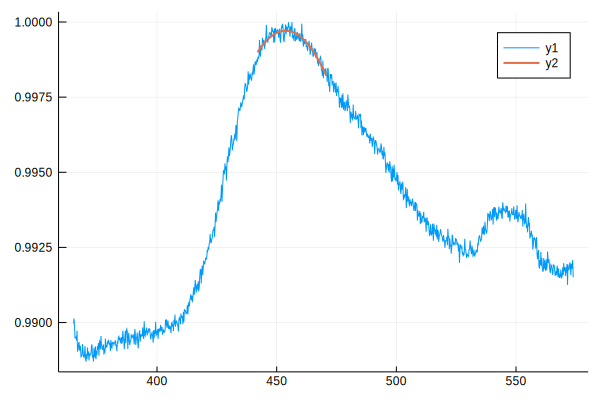

In [85]:
bg_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_bg_3.asc"
bg = CSV.read(bg_file,header = ["Wavelength", "Count"])

data_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_sig_7cm.asc"
data = CSV.read(data_file,header = ["Wavelength", "Count"])

signal = (data.Count .- bg.Count)
signal = signal ./ maximum(signal)
peak_bin = findfirst(isequal(maximum(signal)),signal)
fit_result = curve_fit(model, data.Wavelength[peak_bin - 70:peak_bin+70],
                    signal[peak_bin - 70:peak_bin+70], [1.,1.,1.])
#h = fit(Histogram, bg.Wavelength, weights(signal), nbins = 100)
p = plot(data.Wavelength, signal)
plot!(data.Wavelength[peak_bin - 70:peak_bin+70], x->model(x, fit_result.param), linewidth = 2)

d_fit = diff(model(400:0.01:500, fit_result.param))
                min = minimum(abs.(d_fit))
                peak_bin = findfirst(isequal(min), abs.(d_fit))
                peak_wv = collect(400:0.01:500)[peak_bin]
println(peak_wv)
p

458.61


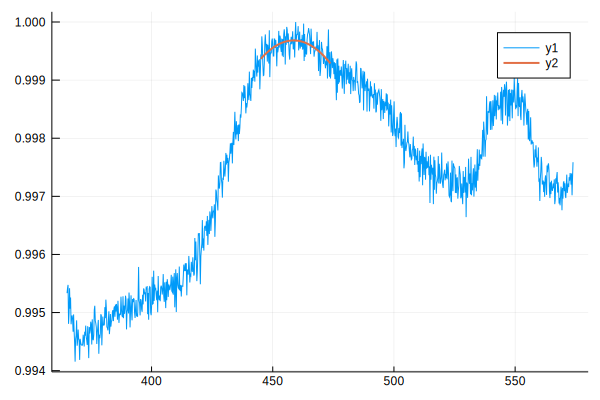

In [84]:
bg_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_bg_3.asc"
bg = CSV.read(bg_file,header = ["Wavelength", "Count"])

data_file = "/remote/ceph/group/gedet/data/pen/2019/atenuationLength/sr90_26MBq_sig_11cm.asc"
data = CSV.read(data_file,header = ["Wavelength", "Count"])

signal = (data.Count .- bg.Count)
signal = signal ./ maximum(signal)
peak_bin = findfirst(isequal(maximum(signal)),signal)
fit_result = curve_fit(model, data.Wavelength[peak_bin - 70:peak_bin+70],
                    signal[peak_bin - 70:peak_bin+70], [1.,1.,1.])
#h = fit(Histogram, bg.Wavelength, weights(signal), nbins = 100)
p = plot(data.Wavelength, signal)
plot!(data.Wavelength[peak_bin - 70:peak_bin+70], x->model(x, fit_result.param), linewidth = 2)

d_fit = diff(model(400:0.01:500, fit_result.param))
                min = minimum(abs.(d_fit))
                peak_bin = findfirst(isequal(min), abs.(d_fit))
                peak_wv = collect(400:0.01:500)[peak_bin]
println(peak_wv)
p